In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
# Load the data
df_0 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4_now with indo new.csv")

In [30]:
# Identify numeric and string columns
numeric_cols_df_0 = df_0.select_dtypes(include=[np.number]).columns.tolist()
string_cols_df_0 = df_0.select_dtypes(exclude=[np.number]).columns.tolist()


In [31]:
# Drop non-numeric columns and target column from numeric columns list
numeric_cols_df_0 = [col for col in numeric_cols_df_0 if col not in string_cols_df_0]

In [32]:
# Remove region between 2700 to 1870
numeric_cols_df_0 = [col for col in numeric_cols_df_0 if not (1870 <= float(col) <= 2700)]

In [33]:
# Define target and features
X = df_0[numeric_cols_df_0]
y = df_0['thnoth_name']

In [34]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [35]:
# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

In [36]:
# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


              precision    recall  f1-score   support

    Non-Thai       0.91      0.72      0.80        88
        Thai       0.86      0.96      0.91       164

    accuracy                           0.88       252
   macro avg       0.89      0.84      0.86       252
weighted avg       0.88      0.88      0.87       252

[[ 63  25]
 [  6 158]]


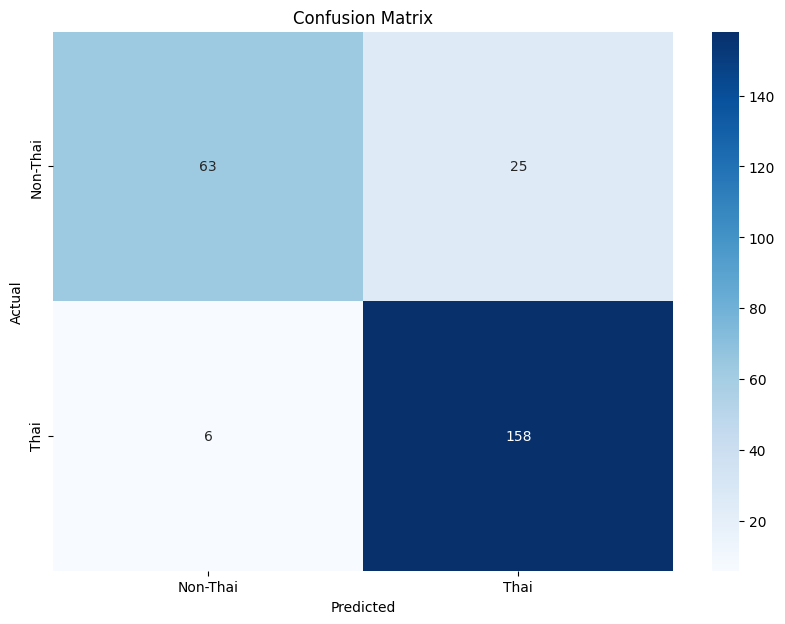

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [38]:
# Add predictions to the test set
df_test = X_test.copy()
df_test['actual'] = y_test
df_test['predicted'] = y_pred
df_test['prov_char'] = df.loc[y_test.index, 'prov_char']

# Group by 'prov_char' to analyze performance
prov_char_analysis = df_test.groupby('prov_char').apply(lambda x: (x['actual'] == x['predicted']).mean())
print(prov_char_analysis)


prov_char
BBX    0.500000
CBI    1.000000
CCO    1.000000
CPN    1.000000
JHR    1.000000
KBI    1.000000
KBX    0.363636
KRI    1.000000
KTX    0.826087
NRT    1.000000
NWT    1.000000
PKN    0.625000
PLG    1.000000
PTN    1.000000
RIX    0.888889
RNG    1.000000
SGR    0.777778
SKM    1.000000
SNI    0.939394
SNK    0.909091
SSX    1.000000
STN    1.000000
SUX    0.750000
TRG    1.000000
dtype: float64


C:\Users\pingk\AppData\Local\Temp\ipykernel_14080\4193033299.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prov_char_analysis = df_test.groupby('prov_char').apply(lambda x: (x['actual'] == x['predicted']).mean())
